# Exploratory Data Analysis

In [175]:
# imported few python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [176]:
# Real.csv was read using pandas pd.read_csv and named it as real
# Fake.csv was read using pandas pd.read_csv and named it as fake

real=pd.read_csv('True.csv')
fake=pd.read_csv('Fake.csv')

In [177]:
# real.head() shows first 5 entries by default

display("Real News",real.head())

'Real News'

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [178]:
# fake.head() shows first 5 entries by default

display("Fake News",fake.head())

'Fake News'

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [179]:
# total no. of columns and rows were found out by the shape attribute

print("real shape :",real.shape)

real shape : (21417, 4)


In [180]:
print("fake shape :",fake.shape)

fake shape : (23481, 4)


In [181]:
real.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [182]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [183]:
# real.isna().sum()->returns the number of NaN values in all columns of a pandas DataFrame

real.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [184]:
fake.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [185]:
# Deleting Redundant columns
# fake.drop([columns...]) is used to delete columns from the dataframe and axis=1 is used to specify that column is to be deleted

fake=fake.drop(['date'],axis=1)


In [186]:
real=real.drop(['date'],axis=1)

In [187]:
# total no.of duplicates

real.duplicated().sum()

209

In [188]:
# Dropping duplicates

real.drop_duplicates(inplace=True)


In [189]:
# Reseting the index from 0

real.reset_index(inplace = True, drop = True)

In [190]:
fake.duplicated().sum()

4

In [191]:
fake.drop_duplicates(inplace=True)


In [192]:
fake.reset_index(inplace = True, drop = True)

In [193]:
real.subject.value_counts()

subject
politicsNews    11217
worldnews        9991
Name: count, dtype: int64

In [194]:
import matplotlib.pyplot as plt
%matplotlib inline

In [195]:
subject=['Politics News','World News']
count=[11217,9991]
xpos=np.arange(len(subject))
xpos

array([0, 1])

Text(0.5, 1.0, 'REAL')

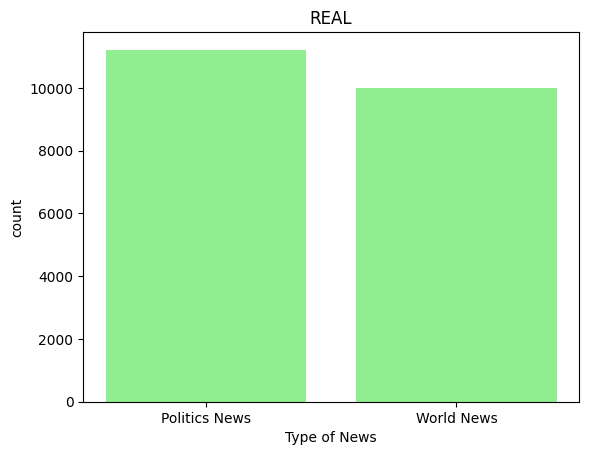

In [196]:
plt.xticks(xpos,subject)
plt.bar(xpos,count,color='lightgreen')
plt.xlabel('Type of News')
plt.ylabel('count')
plt.title('REAL')

In [197]:
fake.subject.value_counts()

subject
News               9050
politics           6838
left-news          4458
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64

In [198]:
subject=['News','Politics','left-news','Govt.','US','Middle east']
count=[9050,6838,4458,1570,783,778]
xpos=np.arange(len(subject))
xpos

array([0, 1, 2, 3, 4, 5])

Text(0.5, 1.0, 'FAKE')

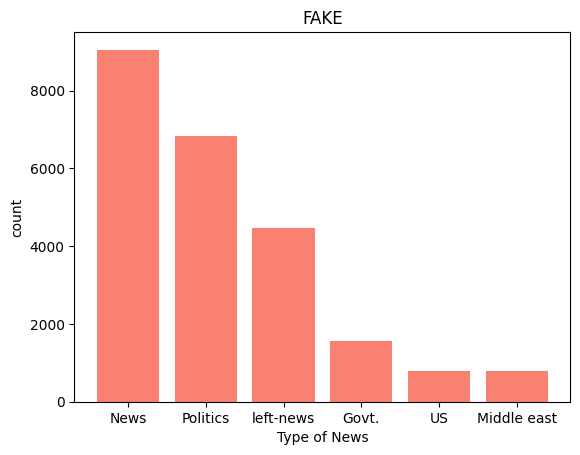

In [199]:
from numpy.ma.core import size
plt.xticks(xpos,subject)
plt.bar(xpos,count,color='salmon')
plt.xlabel('Type of News')
plt.ylabel('count')
plt.title('FAKE')

In [200]:
real.head()

,title,text,subject
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews


# Data Preprocessing 

In [201]:
# converting "title" column to lowerCase

real['title']=real['title'].str.lower()
fake['title']=fake['title'].str.lower()

In [202]:
# importing natural language tool kit
# It is a really powerful tool to preprocess text data for further analysis 
# It helps convert text into numbers, which the model can then easily work with.

import nltk

In [203]:
# importing regex
# function to remove HTML tags if any 

import re
def remove_html_tags(text):
  pattern=re.compile('<.?>')
  return pattern.sub(r'',text)

In [204]:
# removing html tags if any

real['title']=real['title'].apply(remove_html_tags) 
fake['title']=fake['title'].apply(remove_html_tags)

In [205]:
# function to remove urls

def remove_url(text):
  pattern=re.compile(r'https?:\\/S+|www\.\S+')
  return pattern.sub(r'',text)

In [206]:
# removing url

real['title']=real['title'].apply(remove_url) 
fake['title']=fake['title'].apply(remove_url)

In [207]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [208]:
exclude=string.punctuation

In [209]:
# function to remove string punctuations 

def remove_punc(text):
  return text.translate(str.maketrans('','',exclude))

In [210]:
# removing punctuation

real['title']=real['title'].apply(remove_punc) 
fake['title']=fake['title'].apply(remove_punc)

In [211]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [212]:
# function to remove stopwords

def remove_stopwords(text):
  new_text=[]
  for word in text.split():
    if word in stopwords.words('english'):
      new_text.append('')
    else:
      new_text.append(word)
  x=new_text[:]
  new_text.clear()
  return " ".join (x)

In [213]:
# removing stopwords(time comsuming process)

real['title']=real['title'].apply(remove_stopwords)
fake['title']=fake['title'].apply(remove_stopwords)

In [214]:
# creating a new column to distinguish real and fake news 

real['label'] = 1
fake['label'] = 0

In [215]:
real.head()

,title,text,subject,label
0,us budget fight looms republicans flip fisca...,WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1
1,us military accept transgender recruits mond...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1
2,senior us republican senator let mr mueller job,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1
3,fbi russia probe helped australian diplomat t...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1
4,trump wants postal service charge much amaz...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1


In [216]:
fake.head()

,title,text,subject,label
0,donald trump sends embarrassing new year’s ev...,Donald Trump just couldn t wish all Americans ...,News,0
1,drunk bragging trump staffer started russian c...,House Intelligence Committee Chairman Devin Nu...,News,0
2,sheriff david clarke becomes internet joke t...,"On Friday, it was revealed that former Milwauk...",News,0
3,trump obsessed even obama’s name coded w...,"On Christmas day, Donald Trump announced that ...",News,0
4,pope francis called donald trump christmas...,Pope Francis used his annual Christmas Day mes...,News,0


In [217]:
# concatinating both the datasets so that it can be fed to the machine learning model 

concat_data = pd.concat([real[['title','label']],fake[['title','label']]])
concat_data[:5]

,title,label
0,us budget fight looms republicans flip fisca...,1
1,us military accept transgender recruits mond...,1
2,senior us republican senator let mr mueller job,1
3,fbi russia probe helped australian diplomat t...,1
4,trump wants postal service charge much amaz...,1


In [218]:
x=concat_data.iloc[:,0:1];
y=concat_data['label']

In [219]:
x

,title
0,us budget fight looms republicans flip fisca...
1,us military accept transgender recruits mond...
2,senior us republican senator let mr mueller job
3,fbi russia probe helped australian diplomat t...
4,trump wants postal service charge much amaz...
...,...
23472,mcpain john mccain furious iran treated us sa...
23473,justice yahoo settles email privacy classactio...
23474,sunnistan us allied ‘safe zone’ plan take te...
23475,blow 700 million al jazeera america finally ...


In [220]:
y

0        1
1        1
2        1
3        1
4        1
        ..
23472    0
23473    0
23474    0
23475    0
23476    0
Name: label, Length: 44685, dtype: int64

In [221]:
# y should be a 2D numpy array

y=y.to_numpy()


In [222]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [223]:
# spliting dataset in train-test (80:20 ratio)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [224]:
x_train.shape

(35748, 1)

# Feature Engineering

In [225]:
# TOKENIZATION
# BAG OF WORDS - Bag of words is a Natural Language Processing technique of text modelling
# Bag of words tokenizes each document and counts the occurrences of each token.

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x_train_bow=cv.fit_transform(x_train['title']).toarray()
x_test_bow=cv.transform(x_test['title']).toarray()

In [226]:
x_train_bow.shape

(35748, 21802)

# Model Selection 

In [227]:
from sklearn.metrics import accuracy_score

In [228]:
# 1). Random Forest Classifier (Bagging)
# Random Forest is a supervised learning algorithm that works on the concept of bagging

# from sklearn.ensemble import RandomForestClassifier  
# rf= RandomForestClassifier(n_estimators= 100, criterion="entropy",max_depth=13)  # Fine tuning the model using Hyperparameters
# rf.fit(x_train_bow,y_train) # model training
# rf_predictions=rf.predict(x_test_bow)
# rf_accuracy=accuracy_score(y_test, rf_predictions)
# print(rf_accuracy)

In [229]:
# 2). Naive Bayes

# from sklearn.naive_bayes import MultinomialNB
# nb=MultinomialNB()
# nb.fit(x_train_bow,y_train)
# nb_predictions=nb.predict(x_test_bow)
# nb_accuracy=accuracy_score(y_test, nb_predictions)
# print(nb_accuracy)

In [230]:
# 3). Logistic Regression

from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train_bow,y_train)
lg_predictions=lg.predict(x_test_bow)
lg_accuracy=accuracy_score(y_test, lg_predictions)
print(lg_accuracy)

0.9578158218641603


In [231]:
import joblib

# Save the scikit-learn Logistic Regression model
joblib.dump(lg, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

In [232]:
print("Weights shape:", weights.shape)
print("Bias shape:", bias.shape)

Weights shape: (2, 21802)
Bias shape: (2,)


In [233]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

n_classes = 2  # For binary classification
tf_model = keras.Sequential([
    layers.Input(shape=(x_train_bow.shape[1],)),  # Input shape
    layers.Dense(n_classes, activation='softmax')  # Number of classes (2 for binary)
])

# Set weights of the Keras model from the sklearn model
weights = lg.coef_.reshape(1, -1)  # Shape should be (1, n_features) for binary classification
weights = np.vstack((weights, np.zeros(weights.shape[1])))  # Add a row of zeros for the second class

# Set bias for binary classification
bias = np.array([lg.intercept_[0], 0])  # The first value is the bias for the positive class, second is zero

# Set the weights in the Keras model
tf_model.layers[0].set_weights([weights.T, bias])

In [234]:
# Convert the model to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(tf_model)
tflite_model = converter.convert()

# Save the TFLite model
with open("model.tflite", "wb") as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpjyjj90yr\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpjyjj90yr\assets


In [235]:
# Load the TFLite model and allocate tensors
interpreter = tf.lite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Prepare input data for TFLite (convert x_test_bow to float32)
input_data = x_test_bow.astype(np.float32)  # Ensure the data is in float32

# Run inference for all test samples
predictions_tflite = []

for i in range(len(input_data)):
    # Reshape input data to match the model's input shape
    interpreter.set_tensor(input_details[0]['index'], input_data[i].reshape(1, -1))  # Set input tensor
    interpreter.invoke()  # Run inference
    output_data = interpreter.get_tensor(output_details[0]['index'])  # Get output tensor
    predictions_tflite.append(np.argmax(output_data))  # Get the predicted class

# Convert predictions to a numpy array
predictions_tflite = np.array(predictions_tflite)

# Calculate TFLite accuracy
tflite_accuracy = accuracy_score(y_test, predictions_tflite)
print(f"TFLite Model Accuracy: {tflite_accuracy}")

TFLite Model Accuracy: 0.042184178135839766


In [236]:
# 4). KNN 

# from sklearn.neighbors import KNeighborsClassifier
# knn= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2  )
# knn.fit(x_train_bow,y_train)
# knn_predictions=knn.predict(x_test_bow)
# knn_accuracy=accuracy_score(y_test, knn_predictions)
# print(knn_accuracy)

In [237]:
# 5). Decision Tree classifier

# from sklearn.tree import DecisionTreeClassifier  
# dt= DecisionTreeClassifier(criterion='entropy', random_state=0)  
# dt.fit(x_train_bow,y_train)  
# dt_predictions=dt.predict(x_test_bow)
# dt_accuracy=accuracy_score(y_test, dt_predictions)
# print(dt_accuracy)

In [238]:
# accuracy_data = {
#     "Model": ["KNN", "Naive Bayes", "Random Forest", "Logistic Regression", "Decision Tree Classifier"],
#     "Accuracy Score": [knn_accuracy, nb_accuracy, rf_accuracy, lg_accuracy, dt_accuracy]
# }

# accuracy_df = pd.DataFrame(accuracy_data)

# accuracy_df

In [239]:
# plt.figure(figsize=(10.5, 6))
# plt.bar(accuracy_df["Model"], accuracy_df["Accuracy Score"], color=["b", "g", "r", "m", "c"])
# plt.xlabel("Model")
# plt.ylabel("Accuracy Score")
# plt.title("Comparison of Accuracy Scores")
# plt.ylim(0.0, 1.0)
# plt.show()

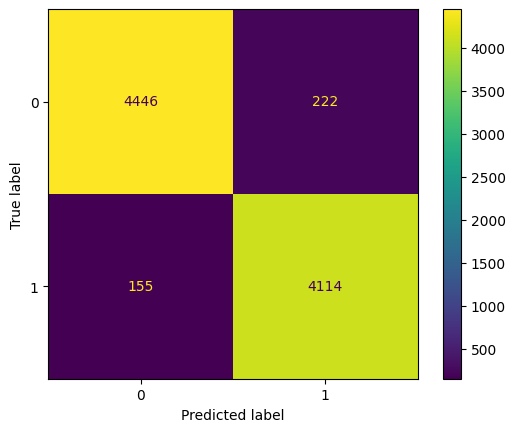

In [240]:
#classification report and confusion matrix of the model that gives best accuracy that comes out to be logistic regression
from sklearn.metrics import precision_score,recall_score,confusion_matrix,roc_curve,classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,lg_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [241]:
x_test_bow.shape

(8937, 21802)

In [242]:
# total test data = 8937
# 4446 + 4114 = 8560 correct answers 
# 222+155 = 377 wrong answers 

In [243]:
acc_score = accuracy_score(y_test,lg_predictions)
pre_score = precision_score(y_test,lg_predictions)
rec_score = recall_score(y_test,lg_predictions)
print('Accuracy_score: ',acc_score)
print('Precision_score: ',pre_score)
print('Recall_score: ',rec_score)
print("-"*50)
cr = classification_report(y_test,lg_predictions)
print(cr)

Accuracy_score:  0.9578158218641603
Precision_score:  0.9488007380073801
Recall_score:  0.9636917310845631
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      4668
           1       0.95      0.96      0.96      4269

    accuracy                           0.96      8937
   macro avg       0.96      0.96      0.96      8937
weighted avg       0.96      0.96      0.96      8937



# Sentiment Analysis of Fake data using TextBlob

In [244]:
from textblob import TextBlob

In [245]:
def sentiment_calc(text):
    return TextBlob(text).sentiment

In [246]:
fake['sentiment'] = fake['title'].apply(sentiment_calc)

In [247]:
fake.head(5)

,title,text,subject,label,sentiment
0,donald trump sends embarrassing new year’s ev...,Donald Trump just couldn t wish all Americans ...,News,0,"(-0.18181818181818182, 0.6272727272727273)"
1,drunk bragging trump staffer started russian c...,House Intelligence Committee Chairman Devin Nu...,News,0,"(-0.25, 0.5)"
2,sheriff david clarke becomes internet joke t...,"On Friday, it was revealed that former Milwauk...",News,0,"(0.0, 0.0)"
3,trump obsessed even obama’s name coded w...,"On Christmas day, Donald Trump announced that ...",News,0,"(-0.5, 1.0)"
4,pope francis called donald trump christmas...,Pope Francis used his annual Christmas Day mes...,News,0,"(0.0, 0.0)"


In [248]:
fake.iloc[398,0]

'trump praises coast guard’s hurricane relief    wrong reasons   said  awful video'

In [249]:
fake.iloc[398,4]

Sentiment(polarity=-0.75, subjectivity=0.95)

In [250]:
# Function to convert polarity value to sentiment label
def get_sentiment_label(polarity):
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Positive"


In [251]:
# Function to predict sentiment using TextBlob and return sentiment label
def predict_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    return get_sentiment_label(polarity)


In [252]:
# Calculate TextBlob sentiment predictions for each news article
fake['textblob_prediction'] = fake['title'].apply(predict_sentiment)

In [253]:
# Convert the sentiment label to numerical format (1 for positive, 0 for negative)
fake['textblob_sentiment'] = fake['textblob_prediction'].apply(lambda x: 1 if x == 'Positive' else 0)

In [254]:
# Get the actual sentiment labels from your existing "sentiment" column
y_actual = fake['sentiment'].apply(lambda x: 1 if x[0] > 0 else 0)

In [255]:
# Calculate accuracy of TextBlob predictions
accuracy = accuracy_score(y_actual, fake['textblob_sentiment'])
print(f"TextBlob Fake DataSet Sentiment Analysis Accuracy: {accuracy:.2f}")

TextBlob Fake DataSet Sentiment Analysis Accuracy: 0.60


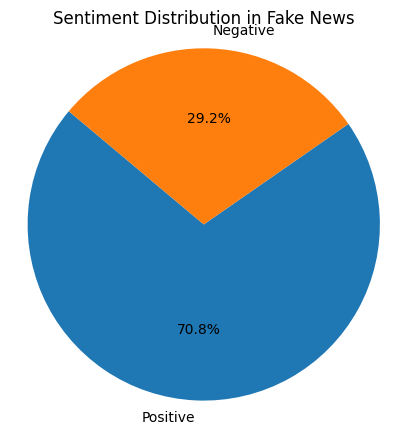

In [256]:
# Get the sentiment value counts for fake news
sentiment_counts_fake = fake['textblob_prediction'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(sentiment_counts_fake, labels=sentiment_counts_fake.index, autopct='%1.1f%%', startangle=140)
plt.title("Sentiment Distribution in Fake News")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [257]:
real.head()

,title,text,subject,label
0,us budget fight looms republicans flip fisca...,WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1
1,us military accept transgender recruits mond...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1
2,senior us republican senator let mr mueller job,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1
3,fbi russia probe helped australian diplomat t...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1
4,trump wants postal service charge much amaz...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1


In [258]:
real['sentiment'] = real['title'].apply(sentiment_calc)

In [259]:
real.iloc[398,0]

'house intel panel advances nsa spying bill despite privacy objections'

In [260]:
real.iloc[398,4]

Sentiment(polarity=0.0, subjectivity=0.0)

In [261]:
# Calculate TextBlob sentiment predictions for each news article
real['textblob_prediction'] = real['title'].apply(predict_sentiment)

In [262]:
# Convert the sentiment label to numerical format (1 for positive, 0 for negative)
real['textblob_sentiment'] = real['textblob_prediction'].apply(lambda x: 1 if x == 'Positive' else 0)

In [263]:
# Get the actual sentiment labels from your existing "sentiment" column
y_actual_real = real['sentiment'].apply(lambda x: 1 if x[0] > 0 else 0)

In [264]:
# Calculate accuracy of TextBlob predictions
accuracy = accuracy_score(y_actual_real, real['textblob_sentiment'])
print(f"TextBlob Real DataSet Sentiment Analysis Accuracy: {accuracy:.2f}")

TextBlob Real DataSet Sentiment Analysis Accuracy: 0.33


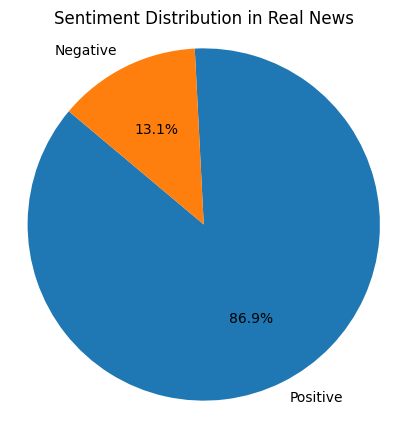

In [265]:
# Get the sentiment value counts for real news
sentiment_counts_real = real['textblob_prediction'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(sentiment_counts_real, labels=sentiment_counts_real.index, autopct='%1.1f%%', startangle=140)
plt.title("Sentiment Distribution in Real News")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [266]:
# Count the occurrences of each sentiment category for fake news
fake_news_sentiments = fake['textblob_prediction'].value_counts()

In [267]:
# Count the occurrences of each sentiment category for real news
real_news_sentiments = real['textblob_prediction'].value_counts()

In [268]:
# Combine the counts for positive and negative sentiments for each category
positive_counts = [fake_news_sentiments.get('Positive', 0), real_news_sentiments.get('Positive', 0)]
negative_counts = [fake_news_sentiments.get('Negative', 0), real_news_sentiments.get('Negative', 0)]

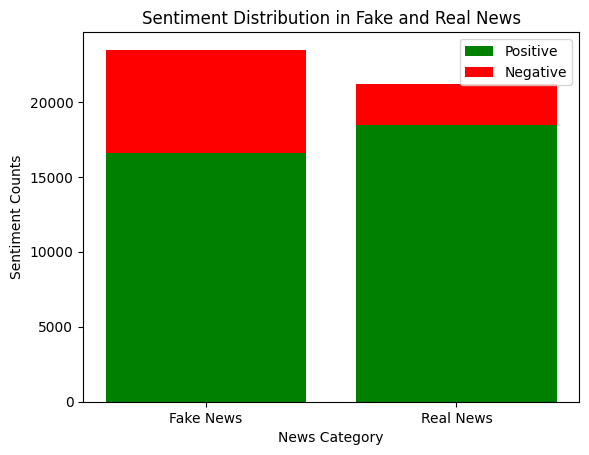

In [269]:
# Plot the stacked bar chart
categories = ['Fake News', 'Real News']
plt.bar(categories, positive_counts, label='Positive', color='green')
plt.bar(categories, negative_counts, bottom=positive_counts, label='Negative', color='red')

plt.xlabel('News Category')
plt.ylabel('Sentiment Counts')
plt.title('Sentiment Distribution in Fake and Real News')
plt.legend()
plt.show()

In [270]:
# Identify significant words or phrases in real and fake news articles
feature_names = cv.get_feature_names_out()
coefficients = lg.coef_[0]

In [271]:
# Combine feature names and their corresponding coefficients
feature_coefficients = list(zip(feature_names, coefficients))

In [272]:
# Sort the features based on coefficients (importance)
sorted_features = sorted(feature_coefficients, key=lambda x: x[1])

In [273]:
# Top 50 significant words or phrases for real news
top_real_words = [feature for feature, coef in sorted_features[:50]]

In [274]:
# Top 50 significant words or phrases for fake news
top_fake_words = [feature for feature, coef in sorted_features[-50:]]

In [275]:
# Generate Word Clouds
from wordcloud import WordCloud
def plot_word_cloud(words, title):
    wordcloud = WordCloud(width=800, height=300, background_color='white').generate(' '.join(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

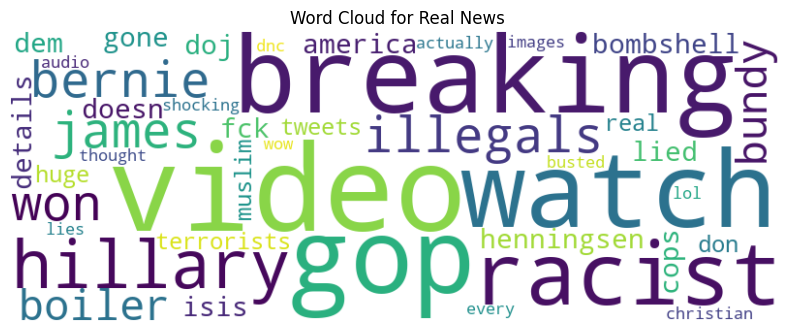

In [276]:
# Plot Word Cloud for Real News
plot_word_cloud(top_real_words, "Word Cloud for Real News")

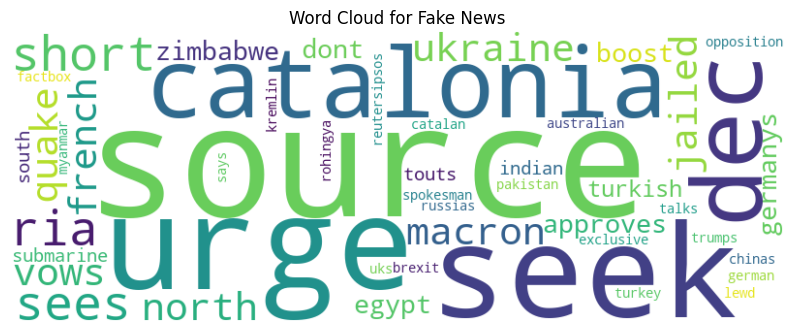

In [277]:
# Plot Word Cloud for Fake News
plot_word_cloud(top_fake_words, "Word Cloud for Fake News")

## Convert to Tflite for Mobile Application

# Summary & Observations 